<a href="https://colab.research.google.com/github/RohitVarri/Plasmodium-Detection-in-Blood-Smears/blob/main/FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip d1.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: /content/cell_images/Uninfected/C236

In [8]:
DATASET_PATH = "/content/cell_images"


In [9]:
!ls /content/cell_images


Parasitized  Uninfected


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [11]:
IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [12]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable = False


In [14]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [15]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=500,
    validation_steps=50
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 94s 188ms/step - accuracy: 0.9016 - loss: 0.3516 - val_accuracy: 0.8400 - val_loss: 0.3959
Epoch 2/10
189/500 ━━━━━━━━━━━━━━━━━━━━ 53s 171ms/step - accuracy: 0.9391 - loss: 0.1594

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9398 - loss: 0.1618 - val_accuracy: 0.8650 - val_loss: 0.3363
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 190ms/step - accuracy: 0.9435 - loss: 0.1611 - val_accuracy: 0.8994 - val_loss: 0.2603
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9552 - loss: 0.1288 - val_accuracy: 0.8888 - val_loss: 0.3128
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 190ms/step - accuracy: 0.9603 - loss: 0.1179 - val_accuracy: 0.9144 - val_loss: 0.2069
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9591 - loss: 0.1157 - val_accuracy: 0.9150 - val_loss: 0.2199
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 190ms/step - accuracy: 0.9653 - loss: 0.1067 - val_accuracy: 0.8712 - val_loss: 0.3972
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9659 - loss: 0.0971 - val_accuracy: 0.8763 - val_loss: 0.3812
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 284ms/step - accuracy: 0.9661 - loss: 0.0942 - val_ac

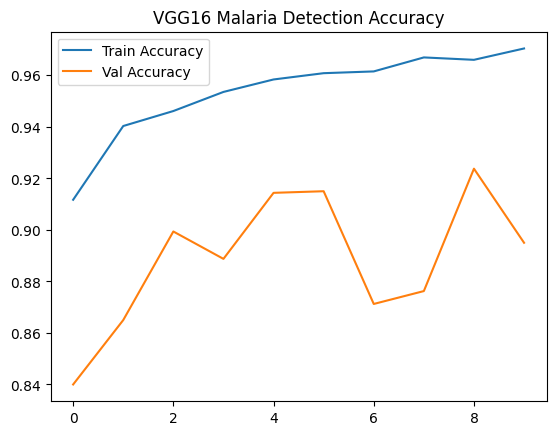

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('VGG16 Malaria Detection Accuracy')
plt.show()


In [19]:
model.save("VGG16_Malaria_Final.keras")


In [20]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model("VGG16_Malaria_Final.keras")


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.applications.vgg16 import preprocess_input


In [47]:
print(train_data.class_indices)


{'Parasitized': 0, 'Uninfected': 1}


In [135]:
uploaded = files.upload()


Saving C2NThinF_IMG_20150604_114631_cell_155.png to C2NThinF_IMG_20150604_114631_cell_155.png


In [136]:
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [137]:
pred = model.predict(img_array)[0][0]

if train_data.class_indices['Parasitized'] == 1:
    label = "Parasitized" if pred > 0.5 else "Uninfected"
else:
    label = "Parasitized" if pred < 0.5 else "Uninfected"

print("Prediction:", label)
print("Raw probability:", pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Uninfected
Raw probability: 0.9987136


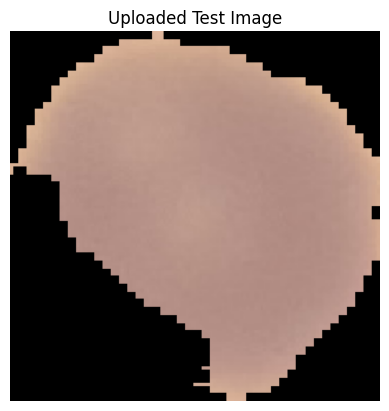

In [138]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Test Image")
plt.show()
